In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

# Модели с абсолютными величинами

In [62]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [63]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [64]:
df[['name', 'grade', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df['h'].str.split('\t',expand=True)

In [65]:
df.head()

,h,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,...,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,nan
0,AAl_13_1\tbest\t271\t5\t1\t3\t11\t23\t23\t0\t8...,AAl_13_1,best,271,5,1,3,11,23,23,...,33,3,6,3,1,19,2,8,66,
1,AAl_27_1\tbest\t200\t0\t0\t1\t10\t14\t14\t0\t5...,AAl_27_1,best,200,0,0,1,10,14,14,...,44,2,6,0,0,12,3,10,77,
2,AAl_30_1\tbest\t217\t2\t1\t1\t13\t19\t19\t0\t4...,AAl_30_1,best,217,2,1,1,13,19,19,...,37,3,11,1,1,23,2,5,65,
3,ZEv_3_1\tbest\t192\t4\t3\t2\t8\t14\t14\t0\t7\t...,ZEv_3_1,best,192,4,3,2,8,14,14,...,32,4,2,1,1,14,3,7,57,
4,EEm_14_1\tbest\t209\t4\t0\t6\t9\t18\t18\t0\t3\...,EEm_14_1,best,209,4,0,6,9,18,18,...,37,3,10,1,0,22,4,7,70,


In [66]:
df = df.drop(['h','nan'], axis=1)

In [67]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,AAl_13_1,best,271,5,1,3,11,23,23,0,...,21,33,3,6,3,1,19,2,8,66
1,AAl_27_1,best,200,0,0,1,10,14,14,0,...,25,44,2,6,0,0,12,3,10,77
2,AAl_30_1,best,217,2,1,1,13,19,19,0,...,13,37,3,11,1,1,23,2,5,65
3,ZEv_3_1,best,192,4,3,2,8,14,14,0,...,18,32,4,2,1,1,14,3,7,57
4,EEm_14_1,best,209,4,0,6,9,18,18,0,...,19,37,3,10,1,0,22,4,7,70


In [68]:
df.shape

(95, 21)

In [69]:
def best_non(row):
    if row['grade'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [70]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
1,AAl_27_1,best,200,0,0,1,10,14,14,0,...,2,6,0,0,12,3,10,77,nonworst,best
2,AAl_30_1,best,217,2,1,1,13,19,19,0,...,3,11,1,1,23,2,5,65,nonworst,best
3,ZEv_3_1,best,192,4,3,2,8,14,14,0,...,4,2,1,1,14,3,7,57,nonworst,best
4,EEm_14_1,best,209,4,0,6,9,18,18,0,...,3,10,1,0,22,4,7,70,nonworst,best


In [71]:
names = df['name']

In [72]:
grades = df['grade']

In [73]:
df_best_non = df.drop(['grade', 'name', 'mark_worst_nonworst'], axis=1)

In [74]:
df_best_non.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest
0,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66,best
1,200,0,0,1,10,14,14,0,5,25,44,2,6,0,0,12,3,10,77,best
2,217,2,1,1,13,19,19,0,4,13,37,3,11,1,1,23,2,5,65,best
3,192,4,3,2,8,14,14,0,7,18,32,4,2,1,1,14,3,7,57,best
4,209,4,0,6,9,18,18,0,3,19,37,3,10,1,0,22,4,7,70,best


In [75]:
df_best_non.shape

(95, 20)

In [76]:
y = df_best_non.values[:, df_best_non.shape[1]-1]

In [77]:
y

array(['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'non

In [78]:
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

# Корреляция признаков

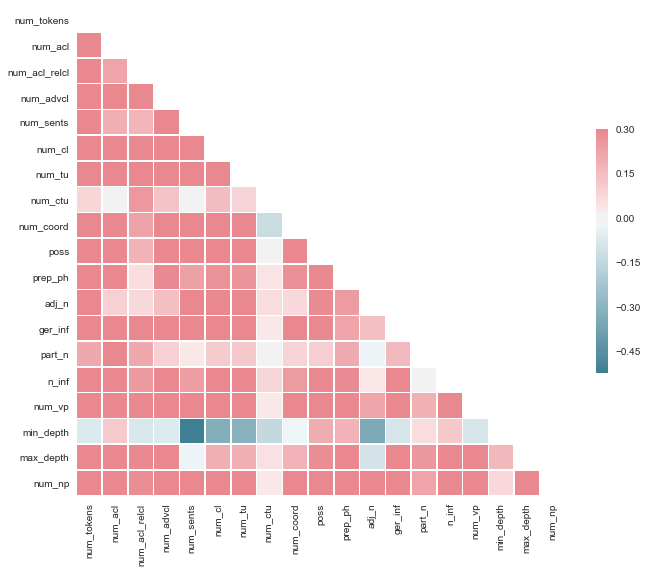

In [79]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

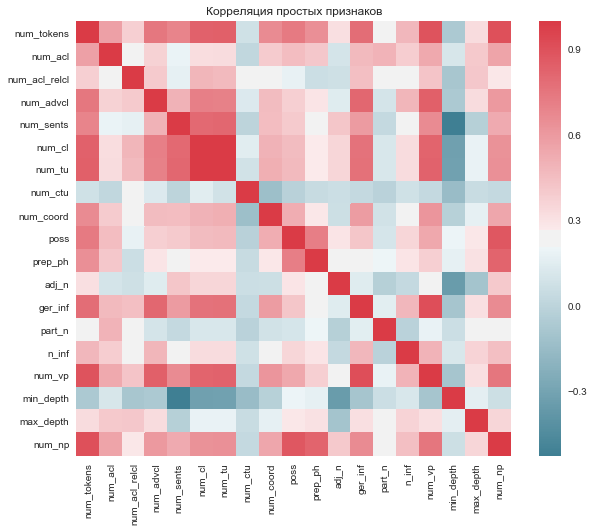

In [80]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция простых признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_simple.png')

# Разделение на тестовую и тренировочную выборку

In [81]:
from sklearn.model_selection import StratifiedKFold

**Примерно:**

Всего: 95 эссе (38 (40%) best; 57 (60%) nonbest)

Тестовая выборка (20%): 19(8 (40%) best; 11 (60%) nonbest)

Тренировочная выборка (80%): 76(30 (40%) best; 46 (60%) nonbest)

In [82]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 46 47 48 49]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 50 51 52 53 54 55 56 57 58 59 60 61]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 62 63 64 65 66 67 68 69 70 71 72]
T

# Дерево решений

In [83]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_pred = clf1.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.50      0.57      0.53         7
    nonbest       0.70      0.64      0.67        11

avg / total       0.62      0.61      0.61        18



In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

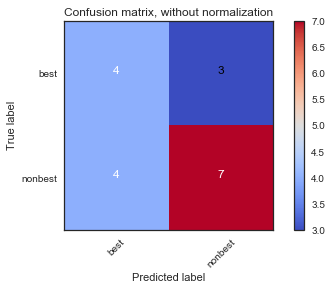

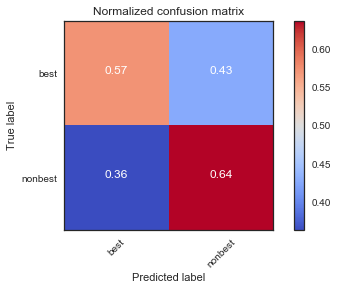

In [87]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [88]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.61


# Дерево решений с выбором лучших гиперпараметров

In [89]:
X_df_best_non.shape[1]

19

In [90]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [91]:
test_ch = [31, 32, 33, 34, 35, 36, 37, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
ess = []
for n in test_ch:
    ess.append([names[n], grades[n]])

In [92]:
y_pred = clf1.predict(X_test)

In [95]:
df_ch = pd.DataFrame(data={'index': test_ch, 'true': y_test, 'predicted': y_pred, 'name': ess})

In [96]:
df_ch

,index,name,predicted,true
0,31,"[LPo_16_2, best]",best,best
1,32,"[ASt_2_2, best]",best,best
2,33,"[ASt_21_2, best]",best,best
3,34,"[ASt_34_2, best]",best,best
4,35,"[13_2, best]",best,best
5,36,"[28_2, best]",best,best
6,37,"[2_2, best]",nonbest,best
7,84,"[DZu_40_1, worst]",nonbest,nonbest
8,85,"[KKo_18_1, worst]",nonbest,nonbest
9,86,"[LPo_8_1, worst]",best,nonbest


In [33]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.75      0.86      0.80         7
    nonbest       0.90      0.82      0.86        11

avg / total       0.84      0.83      0.83        18



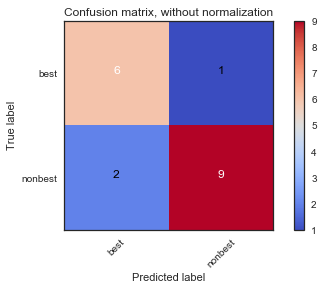

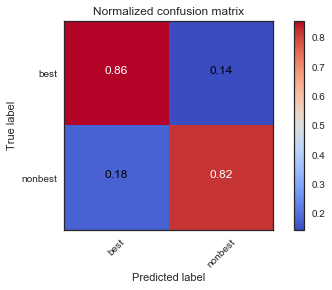

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [35]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.83


In [36]:
import collections

Feature ranking:
    importance   name_feature
14    0.169882          n_inf
0     0.162274     num_tokens
3     0.122788      num_advcl
8     0.117636      num_coord
1     0.106501        num_acl
13    0.069469         part_n
16    0.057754      min_depth
11    0.053171          adj_n
18    0.045455         num_np
4     0.044791      num_sents
12    0.031877        ger_inf
6     0.018402         num_tu
7     0.000000        num_ctu
10    0.000000        prep_ph
5     0.000000         num_cl
15    0.000000         num_vp
2     0.000000  num_acl_relcl
17    0.000000      max_depth
9     0.000000           poss


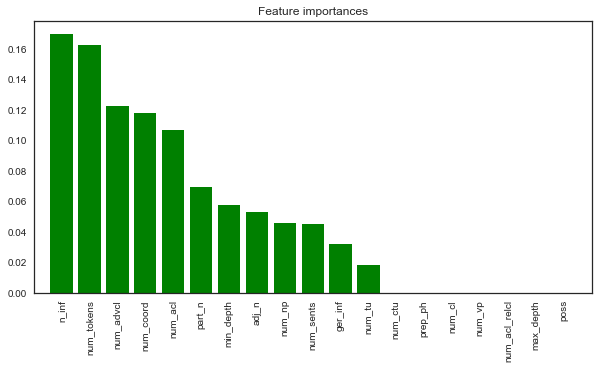

In [37]:
imp(clf1, X_df_best_non.columns)

In [38]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [36]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('/Users/irene/Desktop/Курсовая/graphs/decision_tree.png')

True

# RandomForestClassifier

In [37]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred = clf2.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.50      0.14      0.22         7
    nonbest       0.62      0.91      0.74        11

avg / total       0.58      0.61      0.54        18



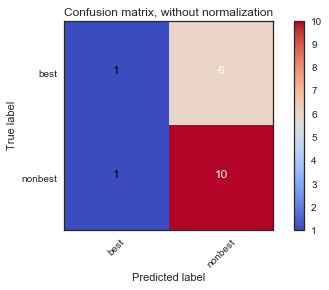

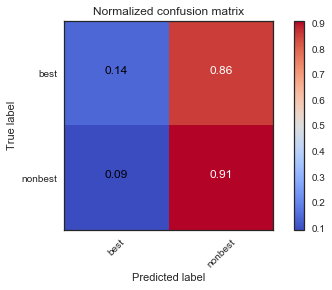

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [41]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.61


# RandomForestClassifier с выбором лучших гиперпараметров

In [42]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

In [43]:
y_test_1

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

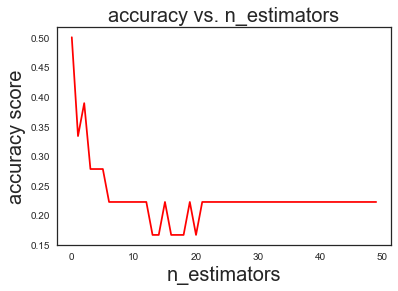

In [44]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [45]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=25, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
clf2.best_params_

{'max_depth': 6, 'max_features': 4}

In [47]:
y_pred = clf2.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.75      0.43      0.55         7
    nonbest       0.71      0.91      0.80        11

avg / total       0.73      0.72      0.70        18



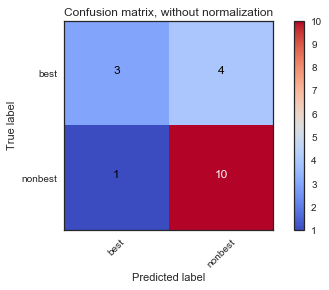

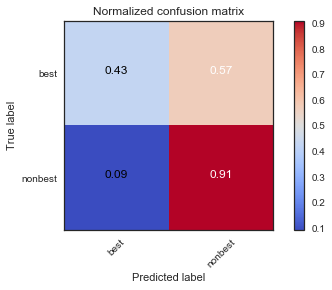

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [50]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.72


Feature ranking:
    importance   name_feature
5     0.099419         num_cl
8     0.090242      num_coord
10    0.088748        prep_ph
12    0.086554        ger_inf
9     0.078657           poss
0     0.076439     num_tokens
3     0.070419      num_advcl
18    0.064465         num_np
11    0.059777          adj_n
15    0.055585         num_vp
2     0.044031  num_acl_relcl
14    0.037214          n_inf
4     0.035526      num_sents
1     0.028099        num_acl
17    0.025652      max_depth
6     0.024223         num_tu
16    0.015746      min_depth
13    0.015447         part_n
7     0.003757        num_ctu


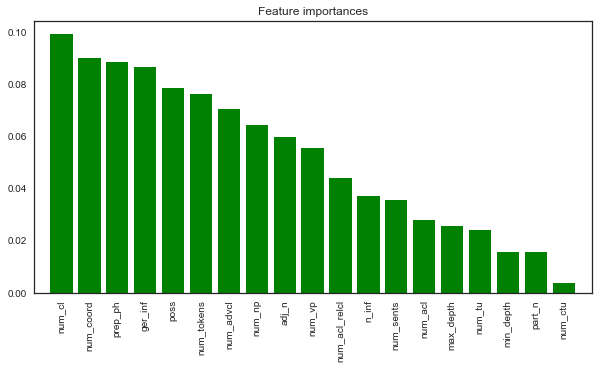

In [51]:
imp(clf2, X_df_best_non.columns)

# LogisticRegression c важными признаками ('l1')

In [52]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_pred = clf3.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.57      0.57      0.57         7
    nonbest       0.73      0.73      0.73        11

avg / total       0.67      0.67      0.67        18



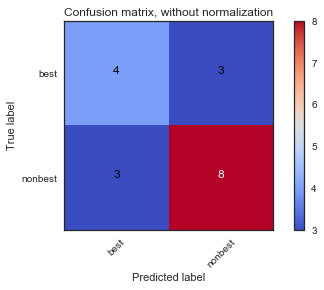

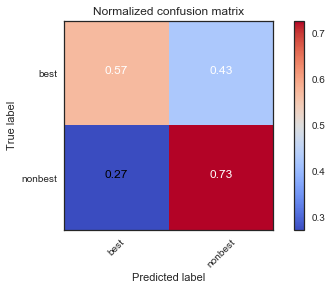

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [56]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.67


# LogisticRegression с лучшими гиперпараметрами

In [57]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
clf3.best_params_

{'C': 7.742636826811269}

In [59]:
y_pred = clf3.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.60      0.43      0.50         7
    nonbest       0.69      0.82      0.75        11

avg / total       0.66      0.67      0.65        18



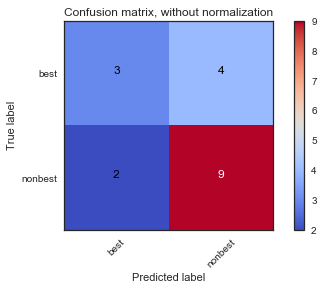

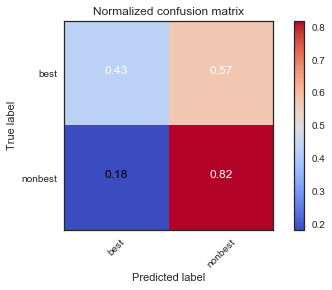

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.67


In [63]:
def imp2(clf_grid, feature_names):
    importances = 100.0 * (abs(clf_grid.coef_[0]) / abs(clf_grid.coef_[0]).max())
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Relative feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [64]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Feature ranking:
    importance   name_feature
13  100.000000         part_n
4    65.138034      num_sents
8    54.034994      num_coord
2    52.042079  num_acl_relcl
14   43.598377          n_inf
1    39.735356        num_acl
3    38.907577      num_advcl
16   31.531142      min_depth
9    25.986069           poss
15   20.901758         num_vp
6    18.132454         num_tu
0     7.732146     num_tokens
10    5.488230        prep_ph
17    4.774372      max_depth
18    4.468706         num_np
11    3.541036          adj_n
12    0.000000        ger_inf
7     0.000000        num_ctu
5     0.000000         num_cl


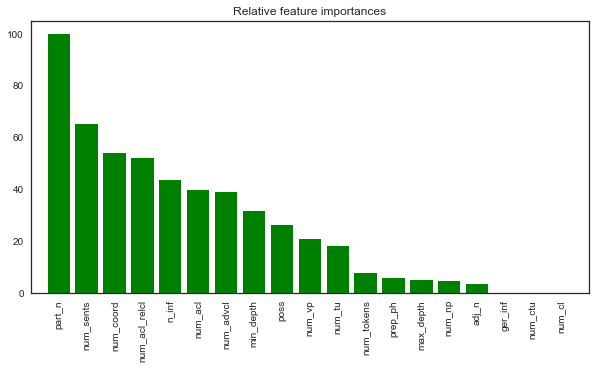

In [65]:
imp2(clf3, X_df_best_non.columns)

# Разделение на три класса

In [66]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
1,AAl_27_1,best,200,0,0,1,10,14,14,0,...,2,6,0,0,12,3,10,77,nonworst,best
2,AAl_30_1,best,217,2,1,1,13,19,19,0,...,3,11,1,1,23,2,5,65,nonworst,best
3,ZEv_3_1,best,192,4,3,2,8,14,14,0,...,4,2,1,1,14,3,7,57,nonworst,best
4,EEm_14_1,best,209,4,0,6,9,18,18,0,...,3,10,1,0,22,4,7,70,nonworst,best


In [67]:
df_three = df.drop(['name', 'mark_best_nonbest', 'mark_worst_nonworst'], axis=1)

In [68]:
df_three.head()

,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,best,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66
1,best,200,0,0,1,10,14,14,0,5,25,44,2,6,0,0,12,3,10,77
2,best,217,2,1,1,13,19,19,0,4,13,37,3,11,1,1,23,2,5,65
3,best,192,4,3,2,8,14,14,0,7,18,32,4,2,1,1,14,3,7,57
4,best,209,4,0,6,9,18,18,0,3,19,37,3,10,1,0,22,4,7,70


In [69]:
y = df_three.values[:, 0]

In [70]:
y

array(['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'worst', 'worst',
       'worst', 'worst', 'worst', 'worst', 'worst', 'worst', 'worst',
       'worst', 'worst', 'worst', 'worst', 'worst', 'worst', 'worst',
       'worst'], dtype=object)

In [71]:
X_three = df_three.drop(['grade'], axis=1)
X_three[X_three.columns] = X_three[X_three.columns].astype(float)
X = X_three.values[:, 0:X_three.shape[1]]

In [72]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

5

In [73]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 78 79 80 81]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 46 47 48 49 50 51 52 53 82 83 84 85]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 54 55 56 57 58 59 60 61 86 87 88]
T

# LogisticRegression c важными признаками ('l1')

In [74]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
y_pred = clf3.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.80      0.50      0.62         8
       best       0.56      0.71      0.63         7
      worst       0.75      1.00      0.86         3

avg / total       0.70      0.67      0.66        18



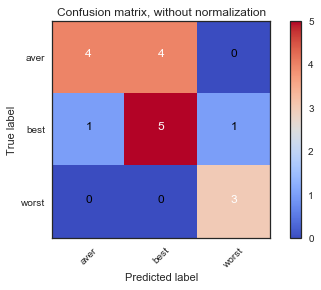

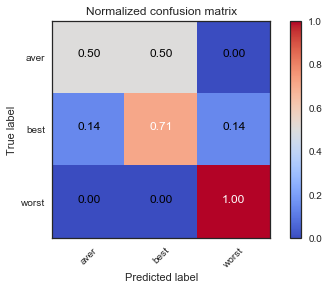

In [77]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [78]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.67


# LogisticRegression с лучшими гиперпараметрами

In [79]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
y_pred = clf3.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.80      0.50      0.62         8
       best       0.56      0.71      0.63         7
      worst       0.75      1.00      0.86         3

avg / total       0.70      0.67      0.66        18



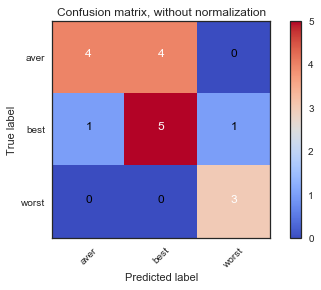

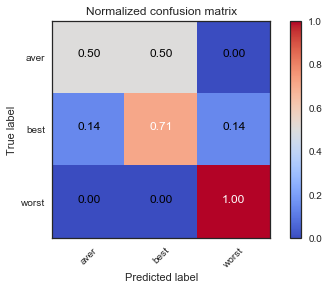

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [83]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.67


In [84]:
clf3.best_params_

{'C': 1.0}

In [85]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance   name_feature
14  100.000000          n_inf
13   80.774784         part_n
16   71.817690      min_depth
15   33.487403         num_vp
8    31.383601      num_coord
12   23.675755        ger_inf
10   21.396415        prep_ph
17   21.358730      max_depth
4    19.649712      num_sents
3     8.761143      num_advcl
6     8.375084         num_tu
9     8.187064           poss
0     4.513372     num_tokens
18    4.396930         num_np
5     4.348126         num_cl
1     3.479167        num_acl
11    2.156670          adj_n
2     0.446872  num_acl_relcl
7     0.000000        num_ctu


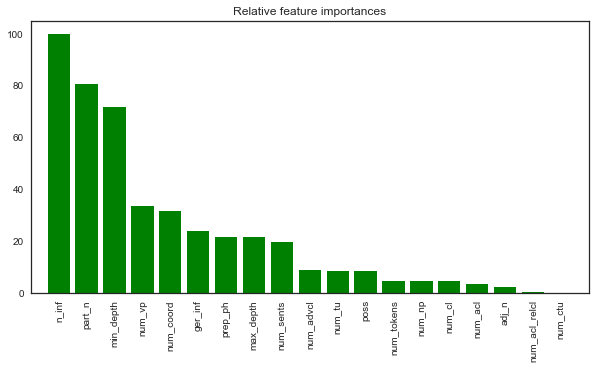

In [86]:
imp2(clf3, X_three.columns)

# Дерево решений

In [87]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
y_pred = clf1.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.43      0.38      0.40         8
       best       0.38      0.43      0.40         7
      worst       1.00      1.00      1.00         3

avg / total       0.50      0.50      0.50        18



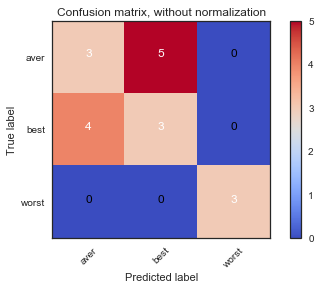

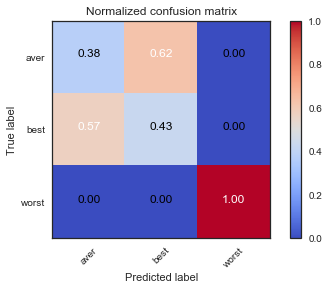

In [90]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [91]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.5


# Дерево решений с выбором лучших гиперпараметров

In [119]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [120]:
y_pred = clf1.predict(X_test)

In [121]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.25      0.12      0.17         8
       best       0.36      0.57      0.44         7
      worst       1.00      1.00      1.00         3

avg / total       0.42      0.44      0.41        18



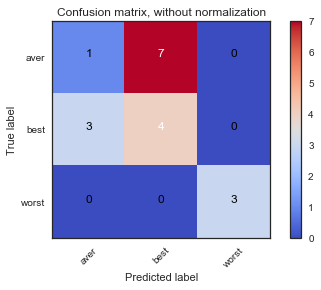

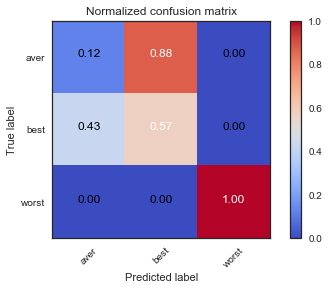

In [122]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.44


Feature ranking:
    importance   name_feature
0     0.422180     num_tokens
2     0.200824  num_acl_relcl
3     0.109495      num_advcl
6     0.100608         num_tu
9     0.074446           poss
17    0.049256      max_depth
14    0.043191          n_inf
5     0.000000         num_cl
4     0.000000      num_sents
7     0.000000        num_ctu
8     0.000000      num_coord
1     0.000000        num_acl
10    0.000000        prep_ph
11    0.000000          adj_n
12    0.000000        ger_inf
13    0.000000         part_n
15    0.000000         num_vp
16    0.000000      min_depth
18    0.000000         num_np


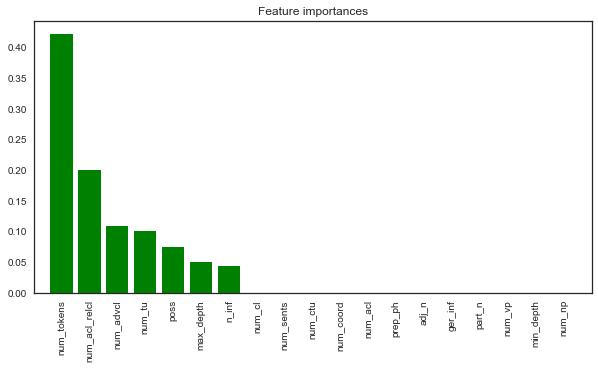

In [124]:
imp(clf1, X_three.columns)

In [125]:
clf1.best_params_

{'max_depth': 4, 'max_features': 3}

In [126]:
clf1 = DecisionTreeClassifier(max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

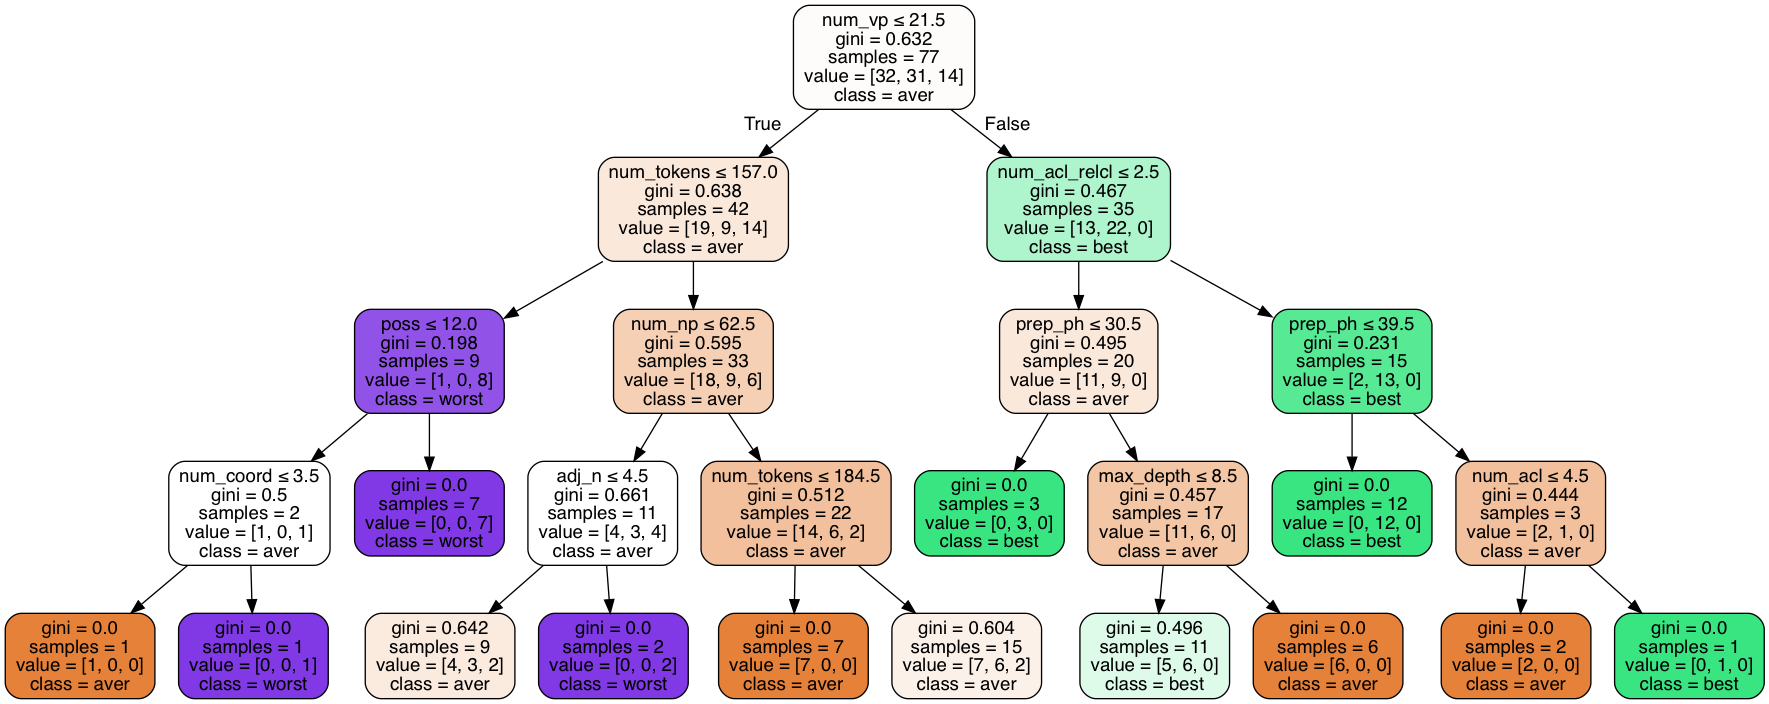

In [127]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [128]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [129]:
y_pred = clf2.predict(X_test)

In [130]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.57      0.50      0.53         8
       best       0.50      0.57      0.53         7
      worst       1.00      1.00      1.00         3

avg / total       0.62      0.61      0.61        18



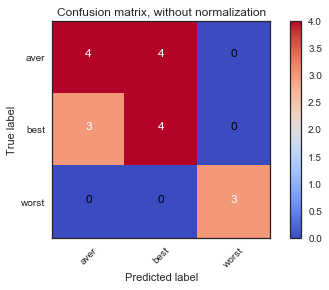

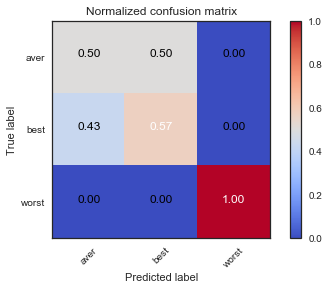

In [131]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [132]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.61


# RandomForestClassifier с выбором лучших гиперпараметров

In [133]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    elif x == 'worst':
        y_test_1.append(0)
    else:
        y_test_1.append(2)

In [134]:
y_test_1

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0]

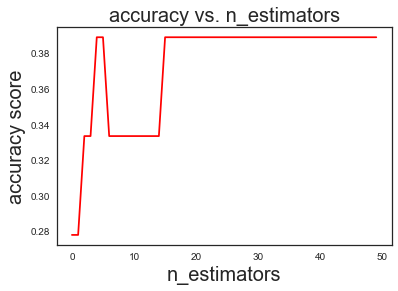

In [135]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [136]:
parameters = {
    'max_features': range(1, X_three.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [137]:
y_pred = clf2.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.38      0.38      0.38         8
       best       0.29      0.29      0.29         7
      worst       1.00      1.00      1.00         3

avg / total       0.44      0.44      0.44        18



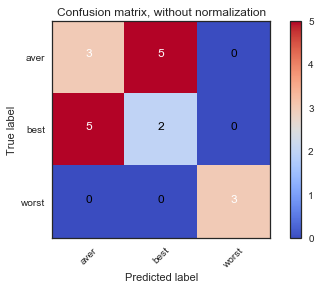

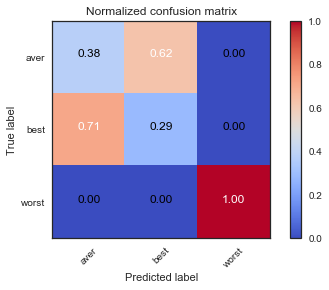

In [139]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [140]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.44


Feature ranking:
    importance   name_feature
0     0.191584     num_tokens
18    0.128430         num_np
10    0.093435        prep_ph
3     0.069393      num_advcl
2     0.068782  num_acl_relcl
9     0.055538           poss
8     0.054616      num_coord
12    0.044829        ger_inf
14    0.043518          n_inf
6     0.041022         num_tu
17    0.038666      max_depth
5     0.037845         num_cl
15    0.037120         num_vp
4     0.031206      num_sents
11    0.026966          adj_n
1     0.024851        num_acl
13    0.007196         part_n
16    0.003683      min_depth
7     0.001323        num_ctu


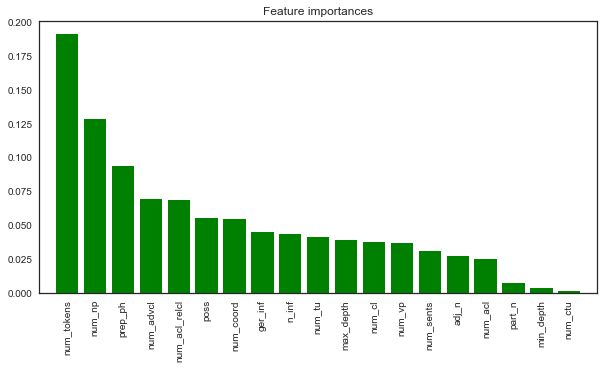

In [141]:
imp(clf2, X_three.columns)

# Worst vs nonworst

In [142]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
1,AAl_27_1,best,200,0,0,1,10,14,14,0,...,2,6,0,0,12,3,10,77,nonworst,best
2,AAl_30_1,best,217,2,1,1,13,19,19,0,...,3,11,1,1,23,2,5,65,nonworst,best
3,ZEv_3_1,best,192,4,3,2,8,14,14,0,...,4,2,1,1,14,3,7,57,nonworst,best
4,EEm_14_1,best,209,4,0,6,9,18,18,0,...,3,10,1,0,22,4,7,70,nonworst,best


In [143]:
df_worst_non = df.drop(['grade', 'name', 'mark_best_nonbest'], axis=1)

In [144]:
y = df_worst_non.values[:, df_worst_non.shape[1]-1]

In [145]:
y

array(['nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonwor

In [146]:
X_worst = df_worst_non.drop(['mark_worst_nonworst'], axis=1)
X_worst[X_worst.columns] = X_worst[X_worst.columns].astype(float)
X = X_worst.values[:, 0:X_worst.shape[1]]

In [147]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

2

In [148]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 47 essays ): [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 87 88 89 90 91 92 93 94] TEST ( 48 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 78 79 80 81 82 83 84 85 86]
TRAIN ( 48 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 78 79 80 81 82 83 84 85 86] TEST ( 47 essays ): [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 87 88 89 90 91 92 93 94]


# Дерево решений

In [149]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

   nonworst       0.97      0.87      0.92        39
      worst       0.58      0.88      0.70         8

avg / total       0.91      0.87      0.88        47



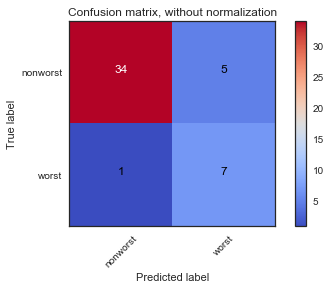

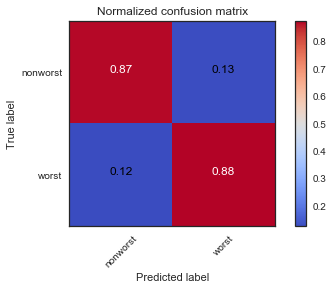

Accuracy:  0.87


In [150]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# Дерево решений с подбором лучших гиперпараметров

In [151]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.85      0.72      0.78        39
      worst       0.21      0.38      0.27         8

avg / total       0.74      0.66      0.69        47



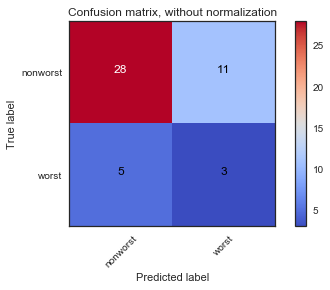

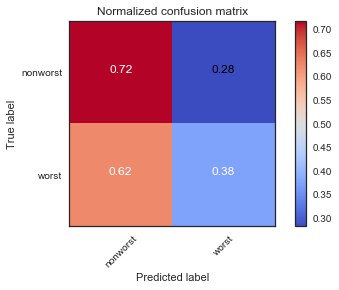

Accuracy:  0.66


In [152]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
0     0.694175     num_tokens
4     0.135801      num_sents
8     0.120426      num_coord
18    0.049598         num_np
3     0.000000      num_advcl
5     0.000000         num_cl
6     0.000000         num_tu
7     0.000000        num_ctu
2     0.000000  num_acl_relcl
1     0.000000        num_acl
10    0.000000        prep_ph
11    0.000000          adj_n
12    0.000000        ger_inf
13    0.000000         part_n
14    0.000000          n_inf
15    0.000000         num_vp
16    0.000000      min_depth
17    0.000000      max_depth
9     0.000000           poss


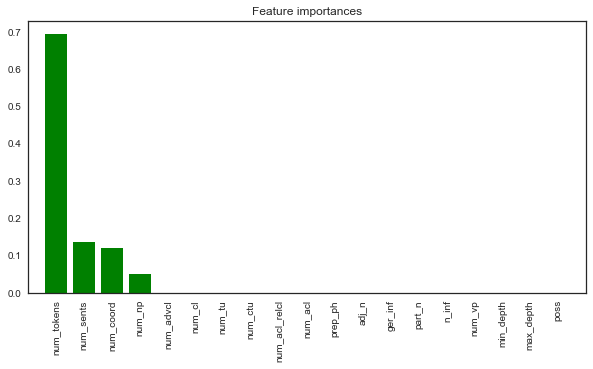

In [153]:
imp(clf1, X_worst.columns)

In [154]:
clf1.best_params_

{'max_depth': 3, 'max_features': 7}

In [155]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features'])
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

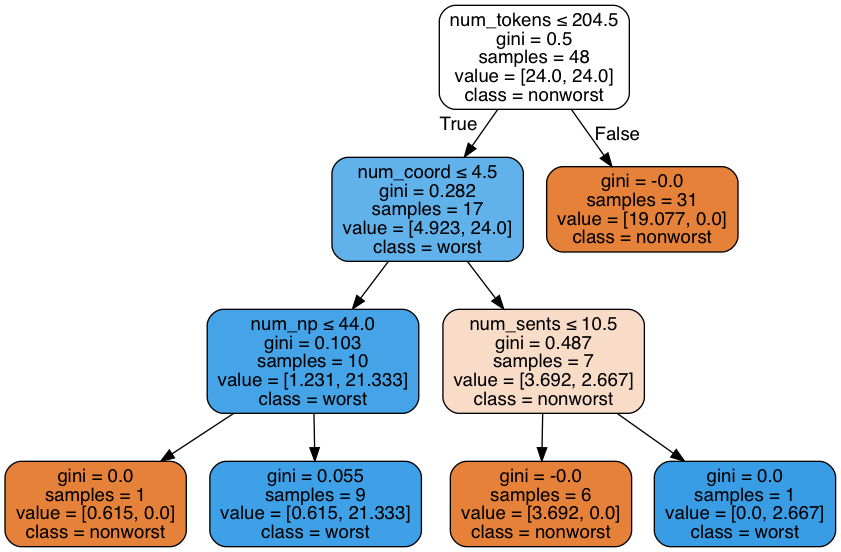

In [156]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [157]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.90      0.95      0.92        39
      worst       0.67      0.50      0.57         8

avg / total       0.86      0.87      0.86        47



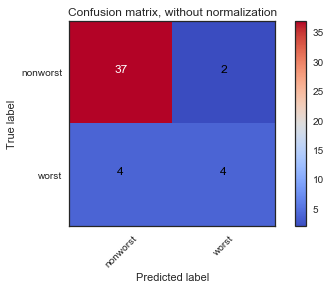

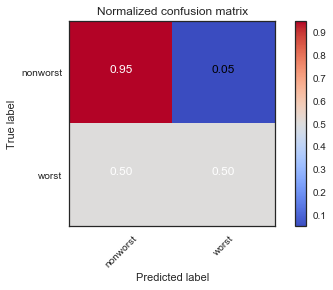

Accuracy:  0.87


In [158]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# RandomForestClassifier c выбором лучших гиперпараметров

In [159]:
y_test_1 = []
for x in y_test:
    if x == 'worst':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

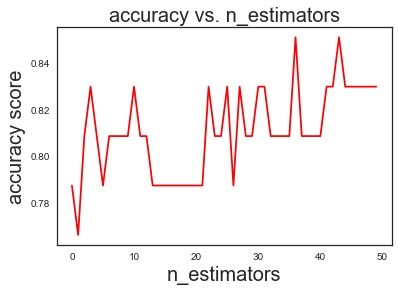

In [160]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [161]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.92      0.90      0.91        39
      worst       0.56      0.62      0.59         8

avg / total       0.86      0.85      0.85        47



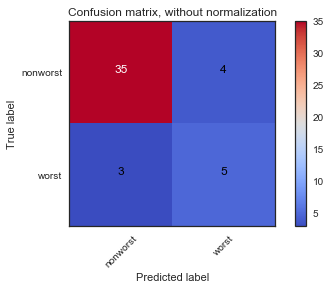

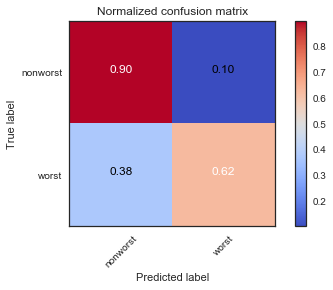

Accuracy:  0.85


In [162]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
5     0.148753         num_cl
6     0.135849         num_tu
8     0.113443      num_coord
3     0.107741      num_advcl
9     0.085338           poss
12    0.066009        ger_inf
14    0.059747          n_inf
15    0.057268         num_vp
18    0.041591         num_np
10    0.035796        prep_ph
11    0.035198          adj_n
17    0.030273      max_depth
0     0.025984     num_tokens
13    0.021221         part_n
1     0.012944        num_acl
2     0.012777  num_acl_relcl
16    0.006151      min_depth
7     0.003254        num_ctu
4     0.000663      num_sents


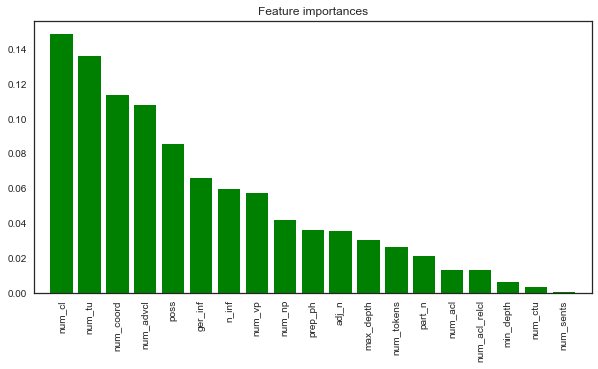

In [163]:
imp(clf2, X_worst.columns)

# LogisticRegression c важными признаками ('l1')

In [164]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.89      0.85      0.87        39
      worst       0.40      0.50      0.44         8

avg / total       0.81      0.79      0.80        47



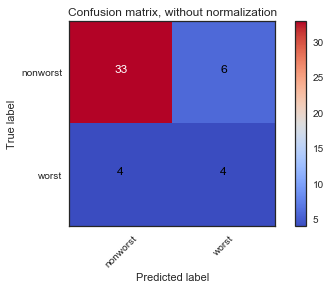

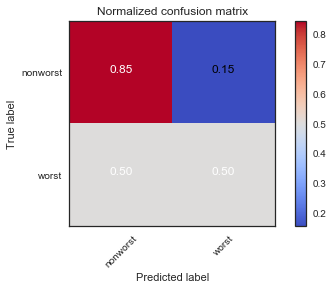

Accuracy:  0.79


In [165]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# LogisticRegression с лучшими гиперпараметрами

In [166]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

             precision    recall  f1-score   support

   nonworst       0.92      0.87      0.89        39
      worst       0.50      0.62      0.56         8

avg / total       0.85      0.83      0.84        47



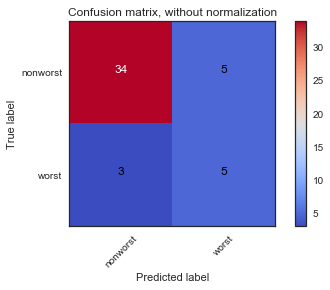

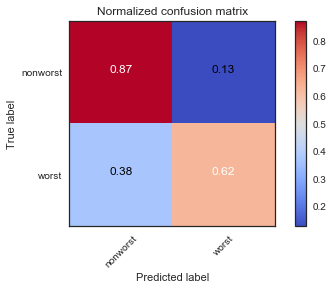

Accuracy:  0.83


In [167]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [168]:
clf3.best_params_

{'C': 166.81005372000593}

In [169]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=166.81005372000593, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Feature ranking:
    importance   name_feature
16  100.000000      min_depth
3    64.344606      num_advcl
14   62.952369          n_inf
1    58.602030        num_acl
4    38.792856      num_sents
11   34.589611          adj_n
15   14.838150         num_vp
8    11.208712      num_coord
12   10.622187        ger_inf
6     9.324935         num_tu
5     9.151440         num_cl
0     5.684915     num_tokens
10    3.130933        prep_ph
18    1.808090         num_np
9     0.036698           poss
13    0.000000         part_n
7     0.000000        num_ctu
2     0.000000  num_acl_relcl
17    0.000000      max_depth


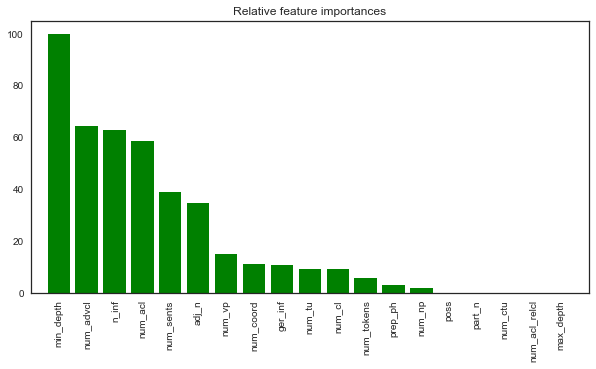

In [170]:
imp2(clf3, X_worst.columns)

# Важность признаков

In [171]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Со сложными признаками

In [172]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [173]:
df[['name', 'grade', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [174]:
df.head()

,h,name,grade,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,...,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,nan
0,AAl_13_1\tbest\t4.27\t32.36\t26.07\t31.4\t25.2...,AAl_13_1,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,...,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82,
1,AAl_27_1\tbest\t5.0\t23.96\t19.56\t25.33\t20.8...,AAl_27_1,best,5.0,23.96,19.56,25.33,20.89,20,14.286,...,1.4,2.5,4.4,0.2,0.6,0.0,0.0,1.2,5.6,
2,AAl_30_1\tbest\t3.85\t20.36\t16.58\t17.83\t13....,AAl_30_1,best,3.85,20.36,16.58,17.83,13.83,16.69,11.421,...,1.462,1.0,2.846,0.231,0.846,0.077,0.077,1.769,6.46,
3,ZEv_3_1\tbest\t4.75\t26.89\t21.68\t26.57\t21.5...,ZEv_3_1,best,4.75,26.89,21.68,26.57,21.57,24,13.714,...,1.75,2.25,4.0,0.5,0.25,0.125,0.125,1.75,4.75,
4,EEm_14_1\tbest\t5.44\t24.75\t20.03\t24.75\t20....,EEm_14_1,best,5.44,24.75,20.03,24.75,20.0,23.22,11.611,...,2.0,2.111,4.111,0.333,1.111,0.111,0.0,2.444,5.78,


In [175]:
df = df.drop(['h','nan'], axis=1)

In [176]:
df.head()

,name,grade,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,AAl_13_1,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,0.348,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82
1,AAl_27_1,best,5.0,23.96,19.56,25.33,20.89,20,14.286,1.4,...,0.357,1.4,2.5,4.4,0.2,0.6,0.0,0.0,1.2,5.6
2,AAl_30_1,best,3.85,20.36,16.58,17.83,13.83,16.69,11.421,1.462,...,0.211,1.462,1.0,2.846,0.231,0.846,0.077,0.077,1.769,6.46
3,ZEv_3_1,best,4.75,26.89,21.68,26.57,21.57,24,13.714,1.75,...,0.5,1.75,2.25,4.0,0.5,0.25,0.125,0.125,1.75,4.75
4,EEm_14_1,best,5.44,24.75,20.03,24.75,20.0,23.22,11.611,2.0,...,0.167,2.0,2.111,4.111,0.333,1.111,0.111,0.0,2.444,5.78


In [177]:
def best_non(row):
    if row['grade'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [178]:
df.head()

,name,grade,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82,nonworst,best
1,AAl_27_1,best,5.0,23.96,19.56,25.33,20.89,20,14.286,1.4,...,2.5,4.4,0.2,0.6,0.0,0.0,1.2,5.6,nonworst,best
2,AAl_30_1,best,3.85,20.36,16.58,17.83,13.83,16.69,11.421,1.462,...,1.0,2.846,0.231,0.846,0.077,0.077,1.769,6.46,nonworst,best
3,ZEv_3_1,best,4.75,26.89,21.68,26.57,21.57,24,13.714,1.75,...,2.25,4.0,0.5,0.25,0.125,0.125,1.75,4.75,nonworst,best
4,EEm_14_1,best,5.44,24.75,20.03,24.75,20.0,23.22,11.611,2.0,...,2.111,4.111,0.333,1.111,0.111,0.0,2.444,5.78,nonworst,best


In [179]:
df_best_non = df.drop(['grade', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

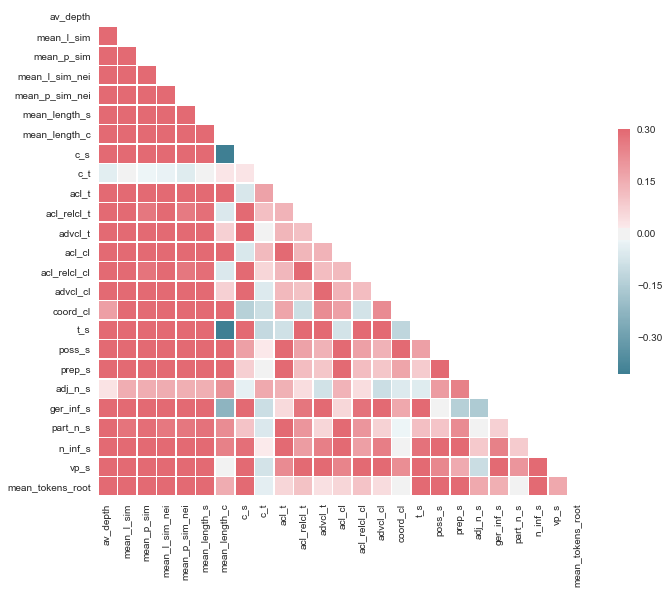

In [180]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

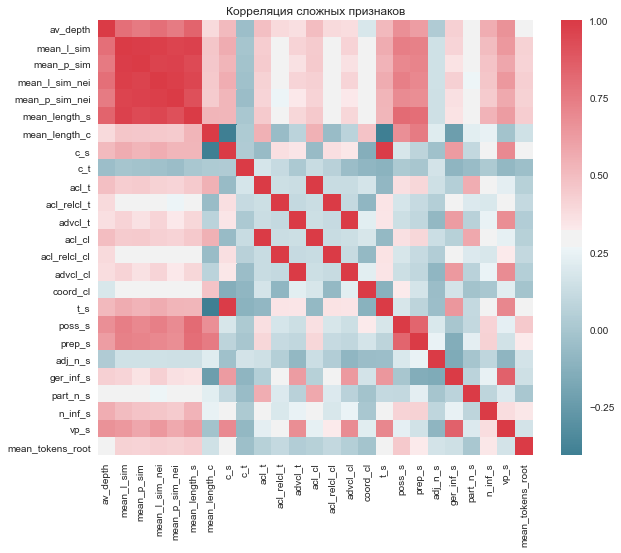

In [181]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция сложных признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_complex.png')

In [182]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 46 47 48 49]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 50 51 52 53 54 55 56 57 58 59 60 61]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 62 63 64 65 66 67 68 69 70 71 72]
T

# Дерево решений

             precision    recall  f1-score   support

       best       0.67      0.86      0.75         7
    nonbest       0.89      0.73      0.80        11

avg / total       0.80      0.78      0.78        18



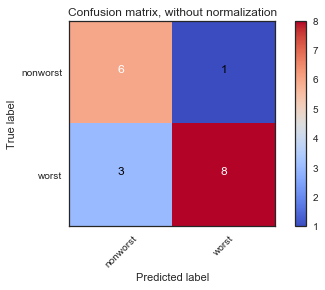

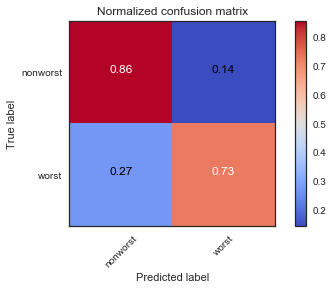

Accuracy:  0.78


In [183]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
18    0.378767            prep_s
12    0.153571            acl_cl
3     0.140000    mean_l_sim_nei
0     0.117987          av_depth
13    0.114074      acl_relcl_cl
8     0.095602               c_t
4     0.000000    mean_p_sim_nei
16    0.000000               t_s
23    0.000000              vp_s
22    0.000000           n_inf_s
21    0.000000          part_n_s
20    0.000000         ger_inf_s
19    0.000000           adj_n_s
2     0.000000        mean_p_sim
17    0.000000            poss_s
14    0.000000          advcl_cl
15    0.000000          coord_cl
5     0.000000     mean_length_s
1     0.000000        mean_l_sim
11    0.000000           advcl_t
10    0.000000       acl_relcl_t
9     0.000000             acl_t
7     0.000000               c_s
6     0.000000     mean_length_c
24    0.000000  mean_tokens_root


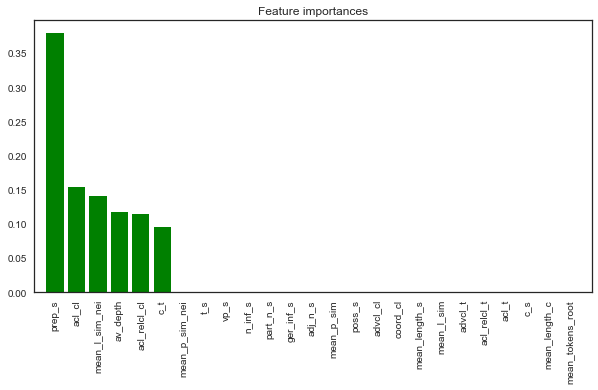

In [184]:
imp(clf1, X_df_best_non.columns)

In [185]:
clf1.best_params_

{'max_depth': 5, 'max_features': 1}

In [186]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

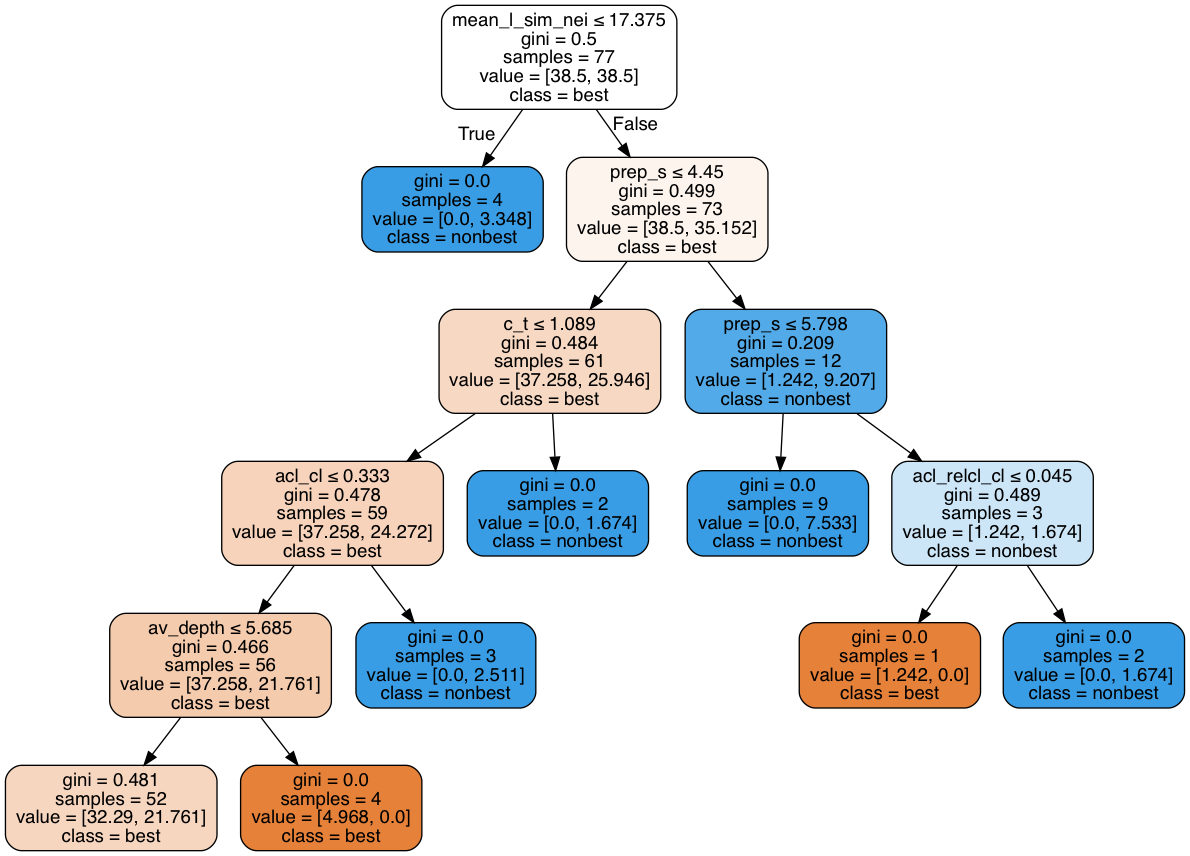

In [187]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [188]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

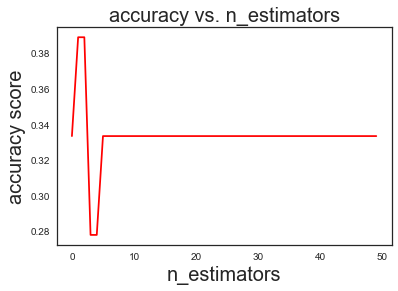

In [189]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [190]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 25), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.60      0.43      0.50         7
    nonbest       0.69      0.82      0.75        11

avg / total       0.66      0.67      0.65        18



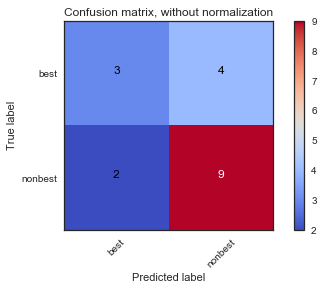

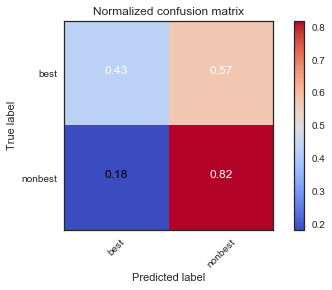

Accuracy:  0.67


In [191]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
6     0.118891     mean_length_c
19    0.102227           adj_n_s
12    0.095931            acl_cl
0     0.084874          av_depth
10    0.076216       acl_relcl_t
15    0.068128          coord_cl
22    0.054944           n_inf_s
2     0.051755        mean_p_sim
17    0.050200            poss_s
13    0.048295      acl_relcl_cl
1     0.042803        mean_l_sim
4     0.034625    mean_p_sim_nei
21    0.028691          part_n_s
5     0.026471     mean_length_s
16    0.022808               t_s
7     0.014638               c_s
14    0.013346          advcl_cl
3     0.012655    mean_l_sim_nei
18    0.011695            prep_s
9     0.011653             acl_t
23    0.008469              vp_s
24    0.008154  mean_tokens_root
11    0.006392           advcl_t
8     0.006140               c_t
20    0.000000         ger_inf_s


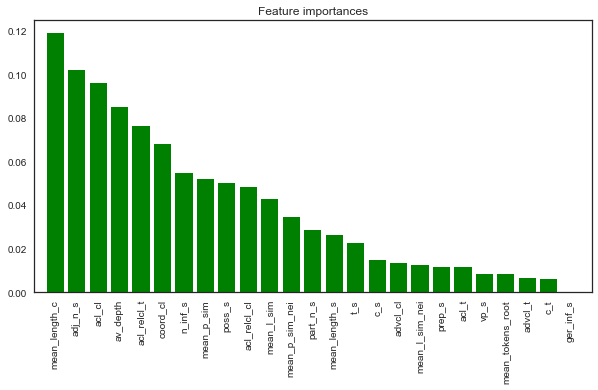

In [192]:
imp(clf2, X_df_best_non.columns)

# LogisticRegression

In [193]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

             precision    recall  f1-score   support

       best       0.80      0.57      0.67         7
    nonbest       0.77      0.91      0.83        11

avg / total       0.78      0.78      0.77        18



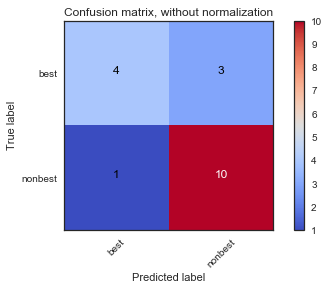

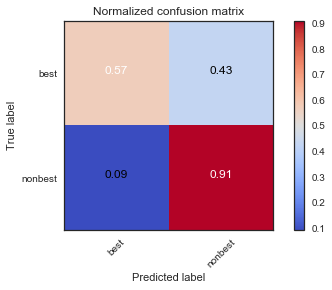

Accuracy:  0.78


In [194]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [195]:
clf3.best_params_

{'C': 10000.0}

In [196]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
12  100.000000            acl_cl
9    93.615506             acl_t
10   85.645468       acl_relcl_t
13   81.778553      acl_relcl_cl
8    15.443084               c_t
21    5.676814          part_n_s
15    5.577983          coord_cl
11    4.490064           advcl_t
7     4.120040               c_s
16    3.380630               t_s
22    2.159646           n_inf_s
17    2.066222            poss_s
20    1.421290         ger_inf_s
19    1.421068           adj_n_s
0     0.967836          av_depth
23    0.957625              vp_s
6     0.918972     mean_length_c
18    0.664879            prep_s
4     0.404230    mean_p_sim_nei
2     0.335055        mean_p_sim
14    0.296829          advcl_cl
5     0.217400     mean_length_s
3     0.111866    mean_l_sim_nei
24    0.091370  mean_tokens_root
1     0.005823        mean_l_sim


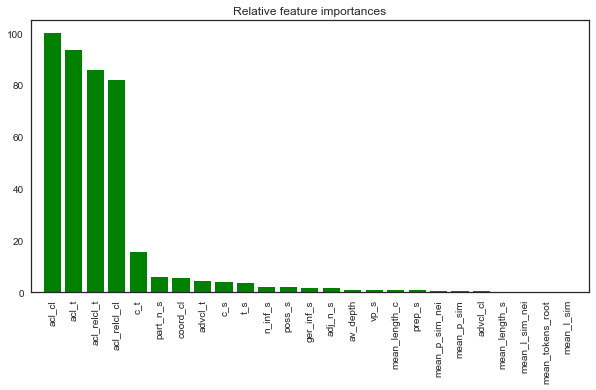

In [197]:
imp2(clf3, X_df_best_non.columns)

# Всё в куче

In [198]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [199]:
df2 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [200]:
df[['name', 'grade', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [201]:
df2[['name', 'grade', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df2['h'].str.split('\t',expand=True)

In [202]:
df = df.drop(['h','nan'], axis=1)

In [203]:
df.head()

,name,grade,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,AAl_13_1,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,0.348,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82
1,AAl_27_1,best,5.0,23.96,19.56,25.33,20.89,20,14.286,1.4,...,0.357,1.4,2.5,4.4,0.2,0.6,0.0,0.0,1.2,5.6
2,AAl_30_1,best,3.85,20.36,16.58,17.83,13.83,16.69,11.421,1.462,...,0.211,1.462,1.0,2.846,0.231,0.846,0.077,0.077,1.769,6.46
3,ZEv_3_1,best,4.75,26.89,21.68,26.57,21.57,24,13.714,1.75,...,0.5,1.75,2.25,4.0,0.5,0.25,0.125,0.125,1.75,4.75
4,EEm_14_1,best,5.44,24.75,20.03,24.75,20.0,23.22,11.611,2.0,...,0.167,2.0,2.111,4.111,0.333,1.111,0.111,0.0,2.444,5.78


In [204]:
df2 = df2.drop(['h','nan', 'grade', 'name'], axis=1)

In [205]:
df2.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66
1,200,0,0,1,10,14,14,0,5,25,44,2,6,0,0,12,3,10,77
2,217,2,1,1,13,19,19,0,4,13,37,3,11,1,1,23,2,5,65
3,192,4,3,2,8,14,14,0,7,18,32,4,2,1,1,14,3,7,57
4,209,4,0,6,9,18,18,0,3,19,37,3,10,1,0,22,4,7,70


In [206]:
result = pd.concat([df, df2], axis=1)

In [207]:
result.head()

,name,grade,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,AAl_13_1,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,21,33,3,6,3,1,19,2,8,66
1,AAl_27_1,best,5.0,23.96,19.56,25.33,20.89,20,14.286,1.4,...,25,44,2,6,0,0,12,3,10,77
2,AAl_30_1,best,3.85,20.36,16.58,17.83,13.83,16.69,11.421,1.462,...,13,37,3,11,1,1,23,2,5,65
3,ZEv_3_1,best,4.75,26.89,21.68,26.57,21.57,24,13.714,1.75,...,18,32,4,2,1,1,14,3,7,57
4,EEm_14_1,best,5.44,24.75,20.03,24.75,20.0,23.22,11.611,2.0,...,19,37,3,10,1,0,22,4,7,70


In [208]:
def best_non(row):
    if row['grade'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

result['mark_worst_nonworst'] = result.apply(worst_non, axis=1)
result['mark_best_nonbest'] = result.apply(best_non, axis=1)

In [209]:
df_best_non = result.drop(['grade', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

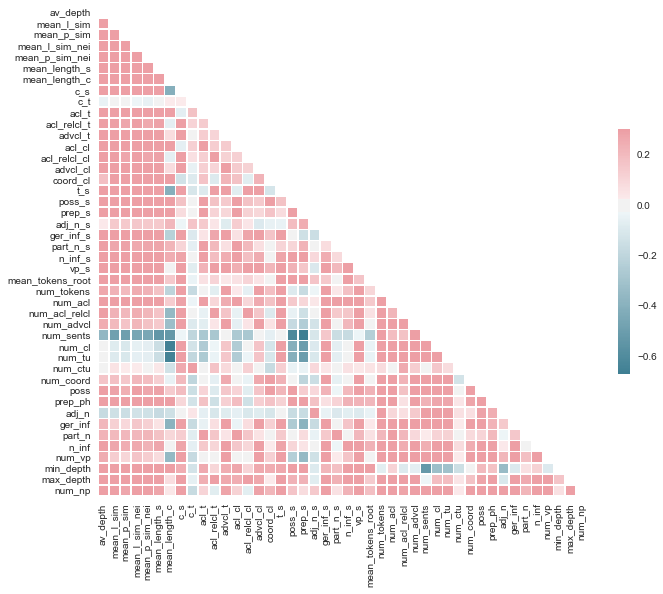

In [210]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

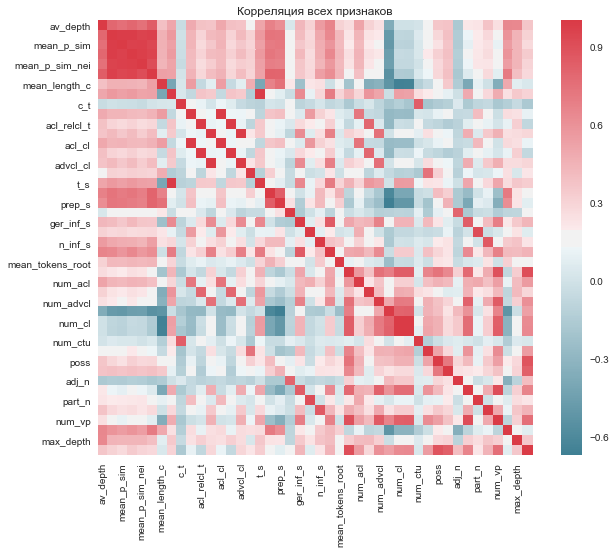

In [211]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция всех признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_all.png')

In [212]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 46 47 48 49]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 50 51 52 53 54 55 56 57 58 59 60 61]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 62 63 64 65 66 67 68 69 70 71 72]
T

# Дерево решений

             precision    recall  f1-score   support

       best       0.44      0.57      0.50         7
    nonbest       0.67      0.55      0.60        11

avg / total       0.58      0.56      0.56        18



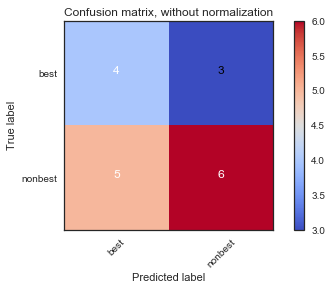

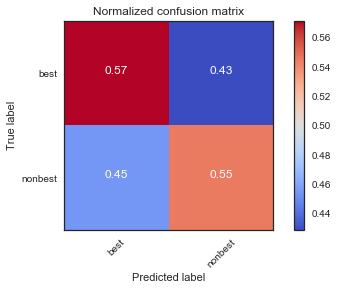

Accuracy:  0.56


In [213]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
28    0.323179         num_advcl
15    0.297007          coord_cl
39    0.215063             n_inf
35    0.085981           prep_ph
12    0.078769            acl_cl
0     0.000000          av_depth
32    0.000000           num_ctu
25    0.000000        num_tokens
26    0.000000           num_acl
27    0.000000     num_acl_relcl
29    0.000000         num_sents
30    0.000000            num_cl
31    0.000000            num_tu
33    0.000000         num_coord
23    0.000000              vp_s
34    0.000000              poss
36    0.000000             adj_n
37    0.000000           ger_inf
38    0.000000            part_n
40    0.000000            num_vp
41    0.000000         min_depth
42    0.000000         max_depth
24    0.000000  mean_tokens_root
22    0.000000           n_inf_s
1     0.000000        mean_l_sim
21    0.000000          part_n_s
2     0.000000        mean_p_sim
3     0.000000    mean_l_sim_nei
4     0.000000    mean_p_s

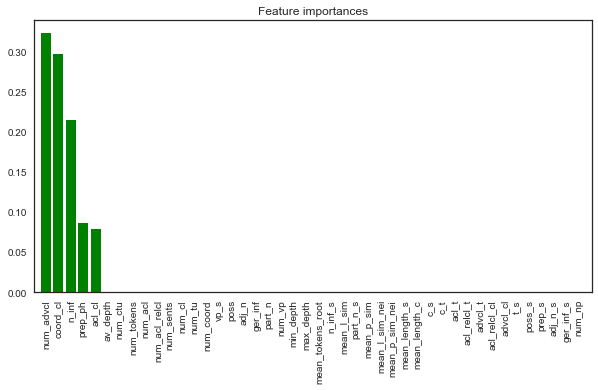

In [214]:
imp(clf1, X_df_best_non.columns)

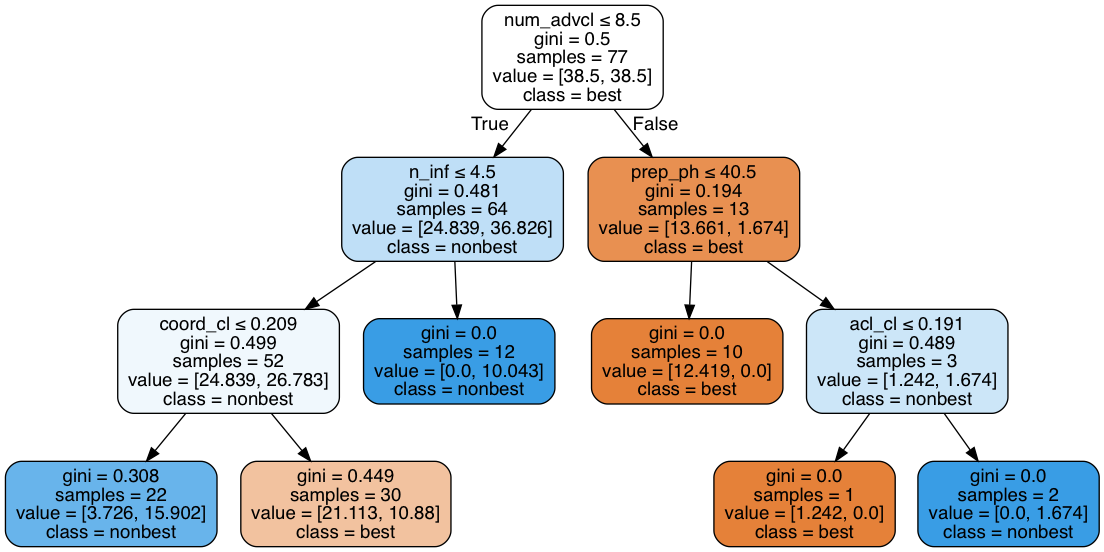

In [215]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Лес решений

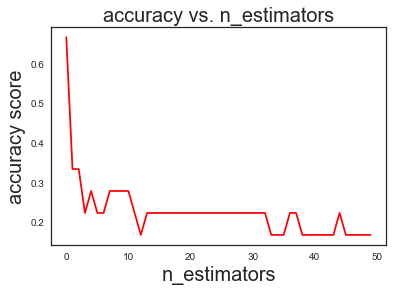

In [216]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [217]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 44), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       1.00      0.14      0.25         7
    nonbest       0.65      1.00      0.79        11

avg / total       0.78      0.67      0.58        18



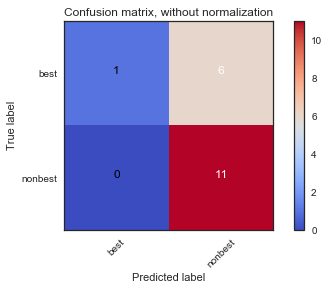

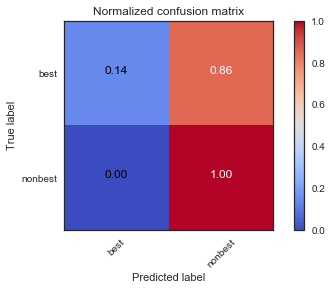

Accuracy:  0.67


In [218]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
15    0.153608          coord_cl
28    0.111289         num_advcl
33    0.067786         num_coord
39    0.063970             n_inf
26    0.051927           num_acl
35    0.050902           prep_ph
43    0.048226            num_np
10    0.046156       acl_relcl_t
31    0.045024            num_tu
23    0.044999              vp_s
27    0.040947     num_acl_relcl
25    0.029056        num_tokens
34    0.027357              poss
12    0.027356            acl_cl
19    0.025622           adj_n_s
21    0.024518          part_n_s
37    0.020863           ger_inf
11    0.018234           advcl_t
5     0.017335     mean_length_s
29    0.017273         num_sents
41    0.017114         min_depth
6     0.014391     mean_length_c
7     0.011543               c_s
14    0.010803          advcl_cl
20    0.007135         ger_inf_s
32    0.006568           num_ctu
40    0.000000            num_vp
36    0.000000             adj_n
38    0.000000            

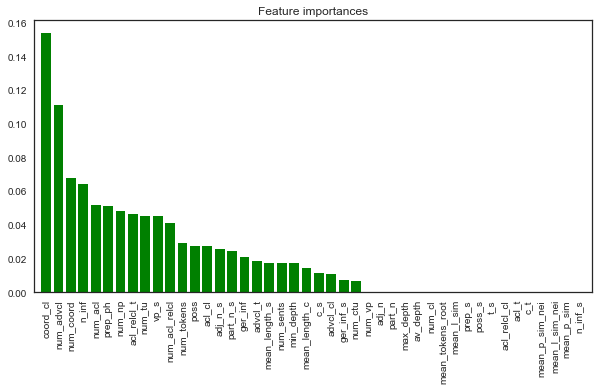

In [219]:
imp(clf2, X_df_best_non.columns)

# Logistic Regression

             precision    recall  f1-score   support

       best       1.00      0.57      0.73         7
    nonbest       0.79      1.00      0.88        11

avg / total       0.87      0.83      0.82        18



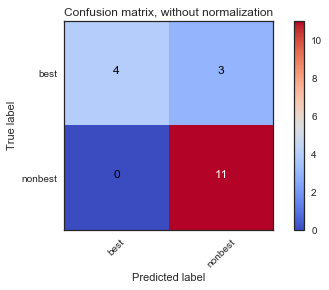

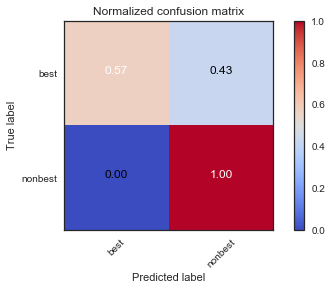

Accuracy:  0.83


In [220]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [221]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
29  100.000000         num_sents
6    61.102352     mean_length_c
31   40.329210            num_tu
5    36.591505     mean_length_s
33   34.318750         num_coord
28   26.879639         num_advcl
2    21.030808        mean_p_sim
39   19.887807             n_inf
3    18.588179    mean_l_sim_nei
38   17.557517            part_n
34   15.535077              poss
27   13.758458     num_acl_relcl
40   13.099797            num_vp
26    7.496942           num_acl
36    5.815116             adj_n
43    5.389232            num_np
25    5.359630        num_tokens
32    0.000000           num_ctu
35    0.000000           prep_ph
30    0.000000            num_cl
24    0.000000  mean_tokens_root
37    0.000000           ger_inf
41    0.000000         min_depth
42    0.000000         max_depth
0     0.000000          av_depth
23    0.000000              vp_s
13    0.000000      acl_relcl_cl
4     0.000000    mean_p_sim_nei
7     0.000000            

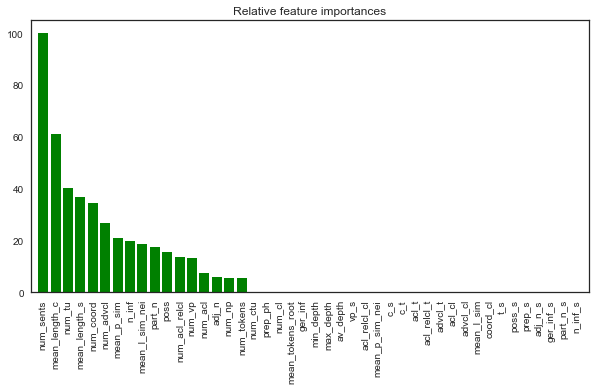

In [222]:
imp2(clf3, X_df_best_non.columns)